<a href="https://colab.research.google.com/github/RuzhiyKot/LaTeX/blob/main/Boyko_Ruslan_Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Практикум №1

**Духоподъемные материалы**:
- [ведомость с оценками,](https://docs.google.com/spreadsheets/d/1TKTMoKeMNhb0pSa6hOa7DUTwCSXMAzlrZHTeXadbETM/edit?usp=sharing)
- [мудрость от Ирины Салтыковой (гугл).](https://disk.yandex.ru/i/pdNYUh8Wdd8C0Q)

**Выполнил**: Бойко Руслан

---

<span style="color:red">Очень важно, чтобы ноутбук запускался по порядку от первой до последней ячейки без ошибок, проверьте это перед отправкой.</span>

**Важные замечания:**
1. Максимум, который можно получить -- 150 баллов (ага, а номеров на целые 200).
2. Не меняйте сигнатуры функций, это поможет проверке.
3. Код списан у соседа -- очень плохо, это расстраивает семинариста, а это хуже, чем ноль баллов (гарантирую).
4. По всем вопросам нужно смело и активно писать в тг мне (@pravafedorov).

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import stats as scs
import typing as tp
from numpy import typing as npt
import seaborn as sns

# Стиль графиков
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

In [ ]:
# ЗАДАЁМ ПАРАМЕТРЫ
SAM_SIZE = 40000 # Размер выборки
Q_SAM_SIZE = 32768 # Размер квази-выборки
n_bins0 = 100 # Количество столбиков
n_bins1 = 10000 # Количество столбиков
n_bins2 = 20000 # Количество столбиков для Коши (задаём побольше, иначе картинка неинформативна)

#### № 1 *(50 баллов)*

Здесь давайте заимпортим `Numpy` и сгенерируем равномерную выборку на отрезке $[0, 1]$ .

- Затем ее нарисуем,
- Затем проверим ее на равномерность с помощью критерия Колмогорова с p-value 0.05,
  с этим неплохо справляется функция `scipy.stats.kstest`.

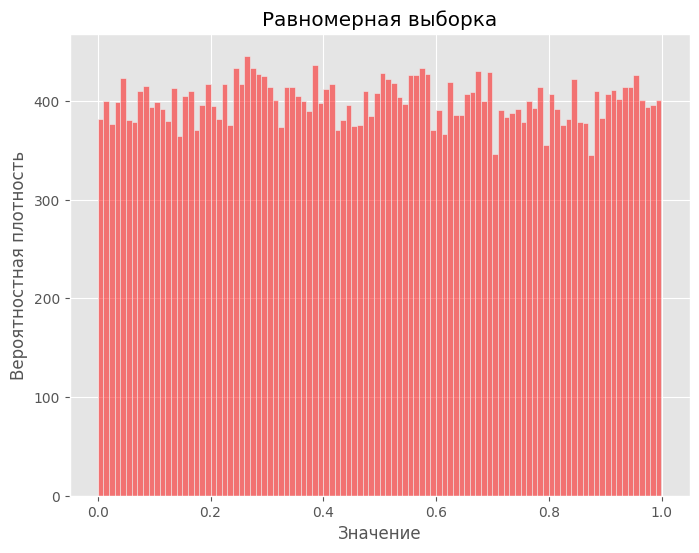

Статистика Колмогорова: 0.005568422868313494
p: 0.16667075982999902
Нулевая гипотеза: Выборка может быть равномерной


In [ ]:
# Генерируем равномерную выборку на [0, 1]
data_uni = np.random.uniform(0, 1, SAM_SIZE)

# Рисуем с помощью matplotlib.pyplot
fig, ax = plt.subplots()
#ax.hist(data_uni, bins=n_bins, color="red", alpha=0.5)
sns.histplot(data=data_uni, bins=n_bins0, kde=False, color="red", alpha=0.5)
ax.set_title("Равномерная выборка")
ax.set_xlabel("Значение")
ax.set_ylabel("Вероятностная плотность")
plt.show()

# Проверм на равномерность с помощью критерия Колмогорова
statistic, p = scs.kstest(data_uni, 'uniform')

print(f'Статистика Колмогорова: {statistic}')
print(f'p: {p}')

if p < 0.05:
    print("Отвергаем нулевую гипотезу: Выборка не является равномерной")
else:
    print("Нулевая гипотеза: Выборка может быть равномерной")

---

#### № 2 (a) *(25 баллов)*

Здесь давайте напишем следующую функцию...

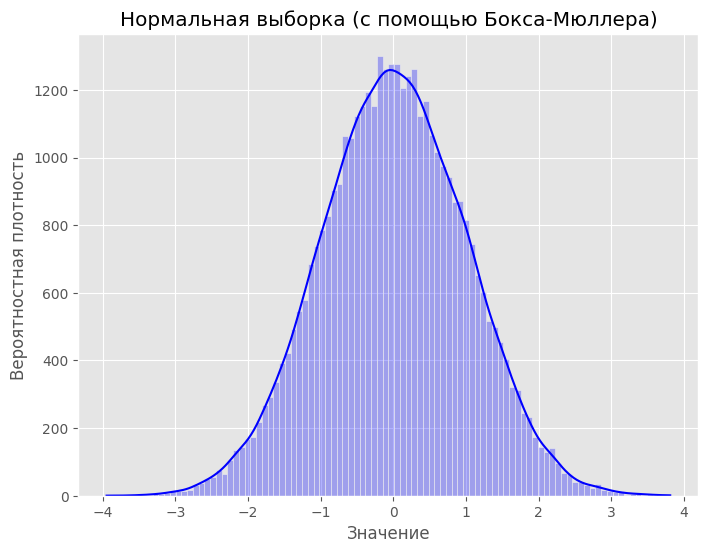

In [ ]:
def box_muller_sampler(uniform_array: npt.NDArray) -> npt.NDArray:
   """
    Generate normally distributed random numbers using the Box-Muller transform.

    Parameters
    ----------
    uniform_array : numpy.ndarray
        An array of uniformly distributed random numbers between 0 and 1.

    Returns
    -------
    numpy.ndarray
        An array of normally distributed random numbers.

    Notes
    -----
    The Box-Muller transform is a method for generating pairs of independent,
    standard, normally distributed (Gaussian) random numbers, given a source
    of uniformly distributed random numbers. This implementation generates
    one normally distributed random number for each pair of uniformly distributed
    random numbers in the input array.

    Examples
    --------
    >>> import numpy as np
    >>> uniform_array = np.random.rand(1000)
    >>> normal_array = box_muller_sampler(uniform_array)
   """
   # Генерируем равномерную выборку, по ней Боксим-Мюллерим
   # Срезы делаем, чтобы это не была одна и та же выборка, иначе они будут зависимыми и
   # получится что-то странное
   r = uniform_array[1::2]
   phi = uniform_array[::2]
   x =  np.sqrt(-2 * np.log(r)) * np.cos(2 * np.pi *phi)
   y = np.sqrt(-2 * np.log(r)) * np.sin(2 * np.pi * phi)
   normal_array = np.concatenate((x, y))
   return normal_array

# Сгенерируем нормальное распределенеи из ранее полученого равномерного с помощью Бокса-Мюллера
data_norm = box_muller_sampler(data_uni)

# Нарисуем
fig, ax = plt.subplots()
#ax.hist(data_norm, bins=n_bins, label="Sample1", color="blue", alpha=0.5)
ax.set_title("Нормальная выборка (с помощью Бокса-Мюллера)")
#ax.legend(loc='upper left')
ax.set_xlabel("Значение")
ax.set_ylabel("Вероятностная плотность")
sns.histplot(data=data_norm, kde=True, legend=True, color="blue", alpha=0.3)
plt.show()

Для выборки из полученного таким образом нормального посчитаем значение статистики Колмогорова (см. №1).

In [ ]:
# Проверим на нормальность с помощью критерия Колмогорова
statistic1, p1 = scs.kstest(data_norm, 'norm')

print(f'Статистика Колмогорова: {statistic1}')
print(f'p-value: {p1}')

if p1 < 0.05:
    print("Отвергаем нулевую гипотезу: Выборка не является нормальной")
else:
    print("Нулевая гипотеза: Выборка может быть нормальной")

Статистика Колмогорова: 0.004212519601051068
p-value: 0.4754987374744277
Нулевая гипотеза: Выборка может быть нормальной


#### №2 (б) *(25 баллов)*

Попробуйте посчитать значение статистики Колмогорова для выборки из «гауссовских» стандартных, полученных не из псевдослучайной равномерной, а из квазислучайной равномерной того же размера. Сравните, сделайте выводы, нарисуйте гистограмму.

Для генерации квазислучайчных используйте `scipy.stats.qmc.Sobol`.


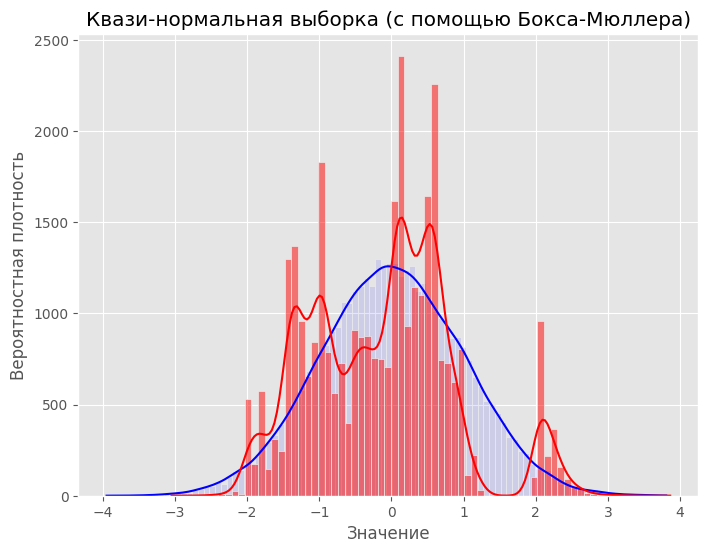

Статистика Колмогорова: 0.10285872256474676
p-value: 2.7316647954343876e-302
Отвергаем нулевую гипотезу: Выборка не является нормальной


In [ ]:
# Сгенерируем квазислучайную авномерную выборку и по ней нормальную (через Бокса-Мюллера)
quasi_uni = scs.qmc.Sobol(d=1).random(Q_SAM_SIZE)
quasi_uni = np.reshape(quasi_uni, Q_SAM_SIZE)
quasi_norm = box_muller_sampler(quasi_uni)

# Нарисуем
fig, ax = plt.subplots()
#ax.hist(data_norm, bins=n_bins, label="Sample1", color="blue", alpha=0.1)
#ax.hist(quasi_norm, bins=n_bins, label="Sample2 (quasi)", color="red", alpha=0.5)
ax.set_title("Квази-нормальная выборка (с помощью Бокса-Мюллера)")
#ax.legend(loc='upper left')
ax.set_xlabel("Значение")
ax.set_ylabel("Вероятностная плотность")
sns.histplot(data=data_norm, kde=True, legend=True, color="blue", alpha=0.1)
sns.histplot(data=quasi_norm, kde=True, legend=True, color="red", alpha=0.5)
plt.show()

# Проверим на нормальность
statistic2, p2 = scs.kstest(quasi_norm, 'norm')
print(f'Статистика Колмогорова: {statistic2}')
print(f'p-value: {p2}')

if p2 < 0.05:
    print("Отвергаем нулевую гипотезу: Выборка не является нормальной")
else:
    print("Нулевая гипотеза: Выборка может быть нормальной")

---

#### №3 (а) *(25 баллов)*

Используя метод обратной функции сделайте сэмплер распределения Коши из равномерного.



~Великая Википедия~ Можно заметить, что если $U\sim U[0,1]$, то ${\mathrm  {tg}}\,\left[\pi \left(U-{1 \over 2}\right)\right]\sim {Cauchy}(0, 1)$ (*на самом деле, это просто вытекает из рассмотренной в классе идеи - интегрируем плотность Коши, получим arctg, берём равномерное и применяем обратную к arctg - это tg, как раз это и требует задание!*). Реализуем данные выкладки в коде ниже:

Статистика Колмогорова: 0.005568422868313494
p-value: 0.16667075982999902
Нулевая гипотеза: Выборка может быть распределена по Коши


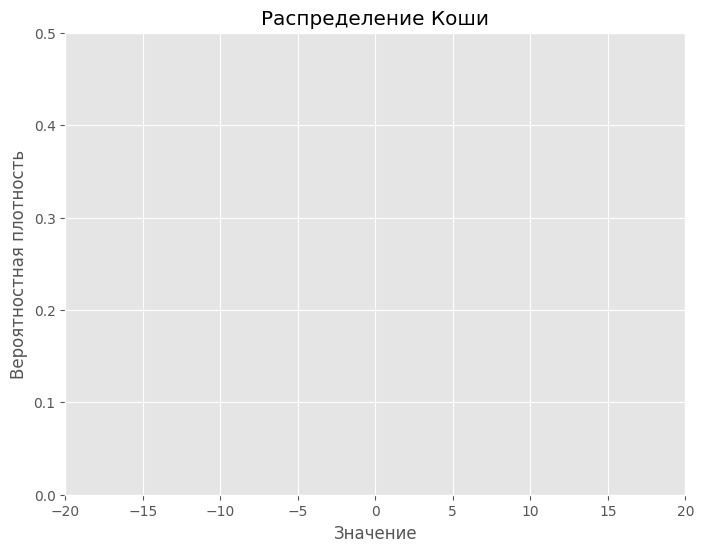

In [ ]:
def cauchy_sampler(uniform_array: npt.NDArray) -> npt.NDArray:
    """
    This function takes a numpy array of uniform
    random numbers and returns a numpy array of
    Cauchy-distributed random numbers.

    Parameters
    ----------
    uniform_array : numpy.ndarray
        A numpy array of uniform random numbers.

    Returns
    -------
    numpy.ndarray
        A numpy array of Cauchy-distributed random numbers.
    """
    return np.tan(np.pi* (uniform_array - 1/2))

data_cauchy = cauchy_sampler(data_uni)

# Нарисуем
fig, ax = plt.subplots()
#ax.hist(data_cauchy, bins=2000, label="Sample3 (Cauchy)", color="orange", alpha=0.7, density=True)
#ax.hist(data_norm, bins=n_bins, label="Sample1", color="blue", alpha=0.1)
ax.set_title("Распределение Коши")
#ax.legend(loc='upper left')
ax.set_xlabel("Значение")
ax.set_ylabel("Вероятностная плотность")
ax.axis([-20, 20, 0, 0.5])

# Можно, конечно, нарисовать, но займёт чуть меньше минуты
#sns.histplot(data=data_norm, stat='density', kde=True, color="blue", alpha=0.3)
#sns.histplot(data=data_cauchy, stat='density', bins=n_bins2, kde=True, color="orange", alpha=0.7)
#plt.show()

# Проверим на нормальность
statistic3, p3 = scs.kstest(data_cauchy, 'cauchy')
print(f'Статистика Колмогорова: {statistic3}')
print(f'p-value: {p3}')

if p3 < 0.05:
    print("Отвергаем нулевую гипотезу: Выборка не является распределённой по Коши")
else:
    print("Нулевая гипотеза: Выборка может быть распределена по Коши")

**Тут виднеются характерные для распределения Коши "*тяжёлые*" хвосты. Да и вообще график вышел "размазанным" по оси абсцисс**

#### №3 (б) *(25 баллов)*

Используя rejection-sampling (как было на семинаре) напишите сэмплер Гауссовского из Коши.

Напомним, что суть метода "принятия-отклонения" состоит в том, что с некоторой вероятностью $r(x) = \frac{1}{C} \frac{q(x)}{p(x)}$ мы принимаем точку в выборку, а с $1 - r(x)$ отклоняем. Зададим *размер выборки* и построим описанную итерационную процедуру.

In [ ]:
 def gaussian_from_cauchy_sampler(uniform_array: npt.NDArray) -> npt.NDArray:
  """
    Generate samples from a Gaussian distribution using the rejection sampling method.

    Parameters
    ----------
    uniform_array : numpy.ndarray
        An array of uniformly distributed random numbers between 0 and 1.

    Returns
    -------
    numpy.ndarray
        An array of samples from a Gaussian distribution.
    """
  # Генерируем из равномерного Коши
  cauchy_samples = cauchy_sampler(uniform_array)
  # Задаём нашу выборку
  norm_from_cauchy = []

  # Находим плотности и константу
  p = scs.cauchy.pdf(cauchy_samples)
  q = scs.norm.pdf(cauchy_samples)
  C = np.max(q / p)

  for i in range(len(cauchy_samples)):
    # Вероятность принять в выборку
    r = q[i] / (C * p[i])

    # Генерируем случайное число равномерно из [0, 1]
    x = np.random.uniform(0, 1, 1)
    if x < r:
      norm_from_cauchy.append(cauchy_samples[i])

  return norm_from_cauchy

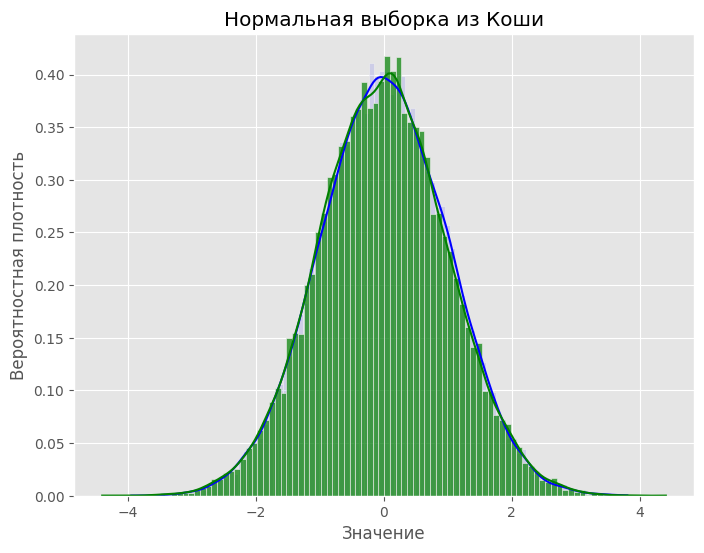

Статистика Колмогорова: 0.008620966143941478
p-value: 0.03917312933995509
Отвергаем нулевую гипотезу: Выборка не является нормальной


In [ ]:
norm_from_cauchy = gaussian_from_cauchy_sampler(data_uni)

fig, ax = plt.subplots()
#ax.hist(norm_from_cauchy, bins=n_bins, label="Sample4", color="blue", alpha=0.5)
ax.set_title("Нормальная выборка из Коши")
#ax.legend(loc='upper left')
ax.set_xlabel("Значение")
ax.set_ylabel("Вероятностная плотность")
sns.histplot(data=data_norm, stat='density', kde=True, color="blue", alpha=0.1)
sns.histplot(data=norm_from_cauchy, stat='density', kde=True, color="green", alpha=0.7)
plt.show()

# Проверим на нормальность
statistic4, p4 = scs.kstest(norm_from_cauchy, 'norm')
print(f'Статистика Колмогорова: {statistic4}')
print(f'p-value: {p4}')

if p4 < 0.05:
    print("Отвергаем нулевую гипотезу: Выборка не является нормальной")
else:
    print("Нулевая гипотеза: Выборка может быть нормальной")

---

#### №4 *(50 баллов)*

Методом Монте-Карло оцените $P(X>4)$ для стандартного гауссовского $X$.
Проиллюстрируйте скорость сходимости.

In [ ]:
 def monte_carlo(num: int, mu: float, sigma: float) -> float:
     #Генерируем нормальную выборку с указанными параметрами
     norm_samples = np.random.normal(size=num, loc=mu, scale=sigma)
     sum = 0.

     #Начинаем считать вероятность
     for i in range(num):
         if norm_samples[i] > 4:
             sum += scs.norm.pdf(norm_samples[i], loc=0, scale=1) / scs.norm.pdf(norm_samples[i], loc=mu, scale=sigma)

     p = sum / num

     return p

Искомая вероятность при N = 100'000 равна:  2e-05


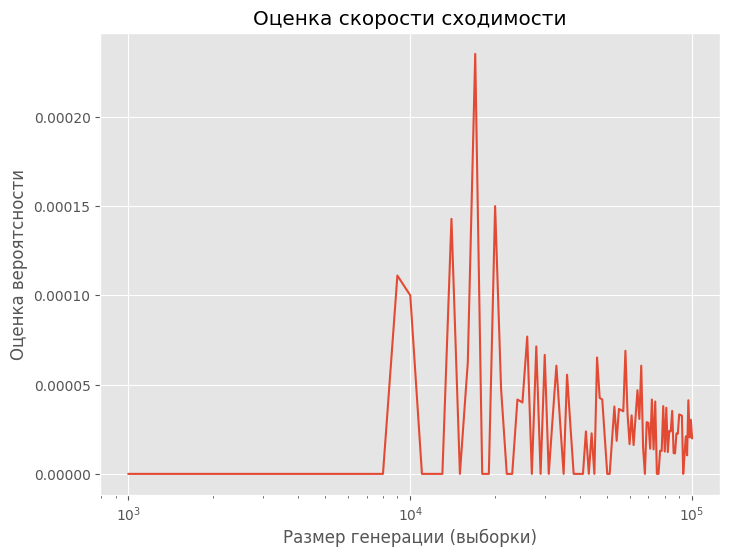

In [ ]:
num_samples = np.arange(1000, 101000, 1000)
p_list = []
for num in num_samples:
  p = monte_carlo(num, 0, 1)
  p_list.append(p)

print('Искомая вероятность при N = 100\'000 равна: ', p_list[-1])

plt.xscale('log')
plt.title('Оценка скорости сходимости')
plt.xlabel('Размер генерации (выборки)')
plt.ylabel('Оценка вероятсности')
plt.plot(num_samples, p_list)
plt.show()